<h1>German data credit risk prediction. </h1>

<h3>This kernel will contain both exploratory analysis and model development for credit risk prediction using the German credit risk dataset </h3> 

<h2>Problem Statement </h2>

<h4>The dataset contains 1000 observations and 10 attributes. Each of the 1000 observations represents a person who takes credit from a bank 
and is thus classified as either a credit risk customer represented by 'bad' or a credit worthy customer represented by 'good'. Therefore the goal of this analysis is; stage 1, to use exploratory visualizations and determine the necessary patterns that indicates whether a customer is not credit worthy or credit worthy and in stage 2, develop a model that can accurately predict the credit worthiness of different customers</h4>

<h4> A description of all the attributes can be seen below!!! </h4>

<H4>

Age (numeric)


Sex (text: male, female)


Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)


Housing (text: own, rent, or free)


Saving accounts (text - little, moderate, quite rich, rich)


Checking account (numeric, in DM - Deutsch Mark)


Credit amount (numeric, in DM)


Duration (numeric, in month)


Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others


Risk (Value target - Good or Bad Risk)

</h4>

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline 
plt.style.use('ggplot')
sns.set_style('darkgrid')

#import hvplot.pandas 
#import holoviews as hv 
#hv.extension('bokeh')

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv")

In [2]:
#read the head of the dataset 
df_credit.head()

,Age,Sex,job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled employee / official,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled employee / official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled - resident,own,little,NaN,2096,12,education,good
3,45,male,skilled employee / official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee / official,free,little,little,4870,24,car,bad


In [3]:
#How many rows and columns are contained in the dataset 
df_credit.shape

(1000, 10)

<h4> Data wrangling stage </h4>

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


<h4> NB: From the above, all the datatypes are okay but then, there are missing values present in the data set especially in savings and checking account.</h4>

<h4> Before the wrangling (possible removal of the rows with missing corresponding missing value int he savings account and the checking account, I will explore the data</h4>

<h2> Data Exploration </h2>

<h3> Exploration 1: Check the distribution of the credit risk </h3>

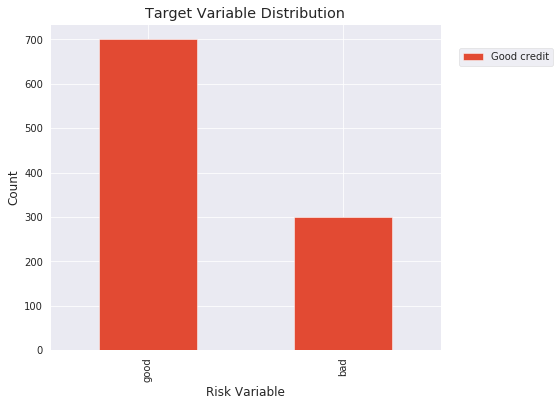

In [5]:
df_credit['Risk'].value_counts().plot(kind= 'bar', figsize = (7, 6), title = 'Target Variable Distribution');
plt.ylabel('Count');
plt.xlabel('Risk Variable');
plt.legend(labels = ['Good credit', 'bad credit'], loc = 'right', bbox_to_anchor = (1.3, 0.9));


<h5><i>From the above bar chart, the distribution of the risks shows that good risk has a count of 700 and bad risk has a count of 300.</i></h5>

<h4> Plot 2: Check the distribution of ages based on the credit risk type </h4> 

In [6]:
good_credit = df_credit.query('Risk == "good"')
bad_credit= df_credit.query('Risk == "bad"')

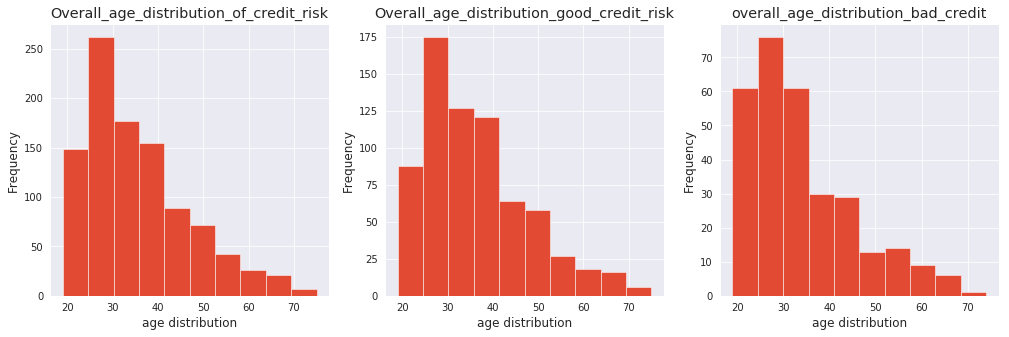

In [7]:
fig, ax = plt.subplots(figsize = (17, 5))

plt.subplot(1, 3, 1)
df_credit['Age'].plot.hist(title = 'Overall_age_distribution_of_credit_risk');
plt.xlabel('age distribution');

plt.subplot(1, 3, 2)
good_credit['Age'].plot.hist(title = 'Overall_age_distribution_good_credit_risk')
plt.xlabel('age distribution');

plt.subplot(1, 3, 3)
bad_credit['Age'].plot.hist(title = 'overall_age_distribution_bad_credit')
plt.xlabel('age distribution');

<h5> The above 3 histograms show the age distribution. The second histogram shows the age distribution of all customers with only good credit included and 
is shows that customers between the ages of 25 - 30 are the accounts for good credit. 
Based on the next histogram which is histogram of customers with bad credit, customers with ages 25 - 30 are also accounts for bad credits. </h5>

<h4> Therefore, it shows that the bulk of the credits were obtained by customers between the ages of 25 - 30. 

<h5> Next plot is a plot of housing distribution based on the credit risk. Most importantly, the ratio of good to bad risk for all housing types would be the most important metric</h5>

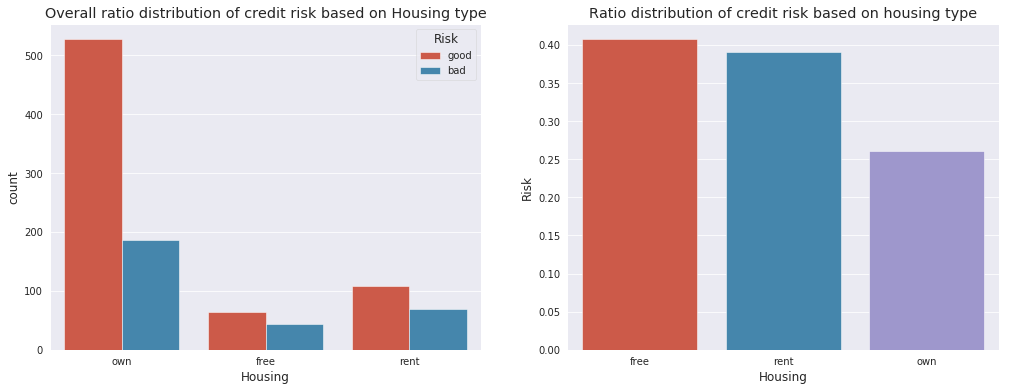

In [8]:
#Overall distribution of housing type based on risk
fig, ax = plt.subplots(figsize = (17, 6))

plt.subplot(1, 2, 1)
plt.title('Overall ratio distribution of credit risk based on Housing type')
sns.countplot(x = 'Housing', data = df_credit, hue = 'Risk');

plt.subplot(1, 2, 2)
housing_ratio = bad_credit.groupby('Housing')['Risk'].count() / df_credit.groupby('Housing')['Risk'].count()
housing_ratio = housing_ratio.reset_index().sort_values(by = 'Risk', ascending = False)
housing_ratio

plt.title('Ratio distribution of credit risk based on housing type')
sns.barplot(x = 'Housing', y= 'Risk', data = housing_ratio);

<h5> Based on the ratio, it can now obvious that people who actually live in a 'free housing' plan are the highest defaulters followed by people who live in 'rented houses'. 
Customers who own their own housing have a higher tendent to not pose a credit risk </h5>

<h5> Distribution of credit amount based on Sex and distribution of Credit risk based on sex </h5> 

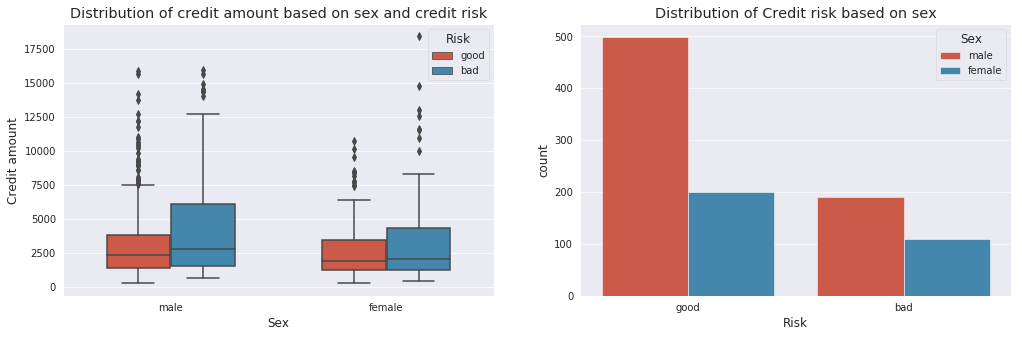

In [9]:
fig, ax = plt.subplots(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of credit amount based on sex and credit risk')
sns.boxplot(x = 'Sex', y = 'Credit amount', hue = 'Risk', data = df_credit, width = 0.6);

plt.subplot(1, 2, 2)
plt.title('Distribution of Credit risk based on sex')
sns.countplot(x = 'Risk', hue = 'Sex', data = df_credit);

<h5> Distribution of credit risk based on Job Type </h5>

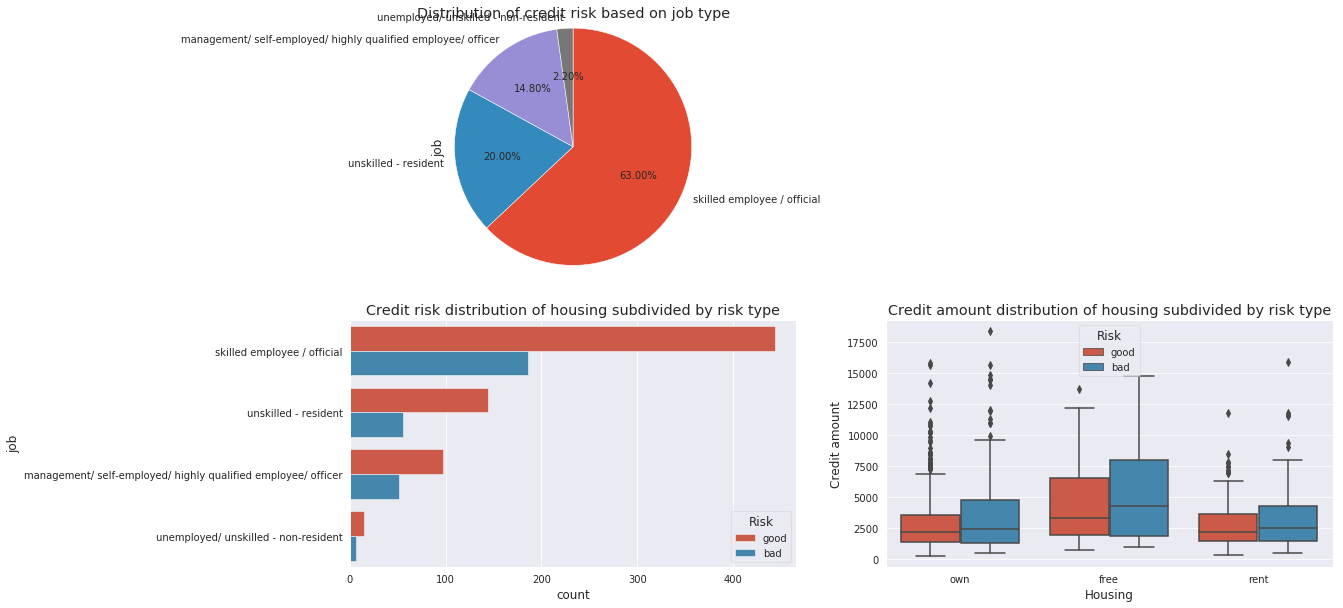

In [10]:
fig, ax = plt.subplots(figsize = (14, 10))
plt.subplots_adjust(right = 1.1)

plt.subplot(2, 2, 1)
plt.title('Distribution of credit risk based on job type')
df_credit['job'].value_counts().plot.pie(y = 'job', startangle = 90, counterclock = False, autopct = '%.2f%%', radius = 1.2);

plt.subplot(2, 2, 3)
plt.title('Credit risk distribution of housing subdivided by risk type')
sns.countplot(y = 'job', hue = 'Risk', data = df_credit);

plt.subplot(2, 2, 4)
plt.title('Credit amount distribution of housing subdivided by risk type')
sns.boxplot(x = 'Housing', y = 'Credit amount', hue = 'Risk', data = df_credit);

<h4> Saving account Exploration </h4> 

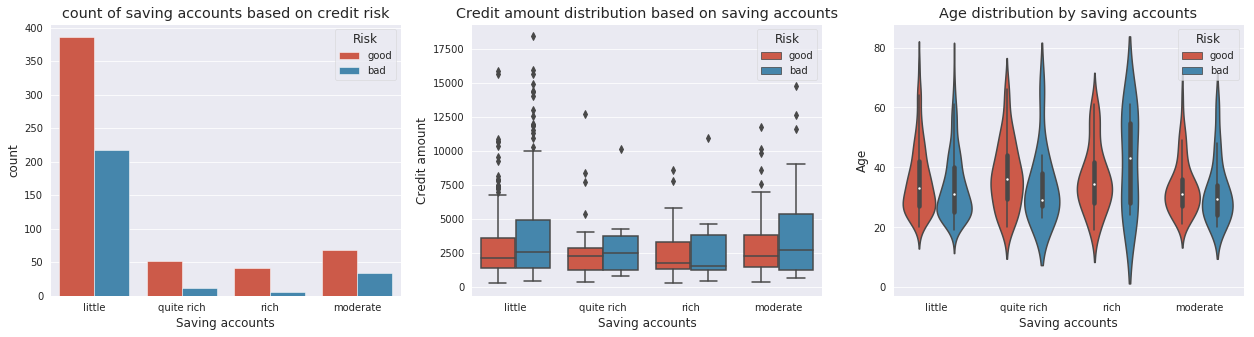

In [11]:
fig, ax = plt.subplots(ncols = 3, figsize = (17, 5))
plt.subplots_adjust(right = 1.1)

ax[0].set_title('count of saving accounts based on credit risk')
sns.countplot(x = 'Saving accounts', data = df_credit, hue = 'Risk', ax = ax[0]);

ax[1].set_title('Credit amount distribution based on saving accounts')
sns.boxplot(x = 'Saving accounts', y = 'Credit amount', hue = 'Risk', data = df_credit, ax = ax[1]);

plt.title('Age distribution by saving accounts')
sns.violinplot(x = 'Saving accounts', y = 'Age', hue = 'Risk', data = df_credit, ax = ax[2]); 

<h4> Distribution credit purpose </h4> 

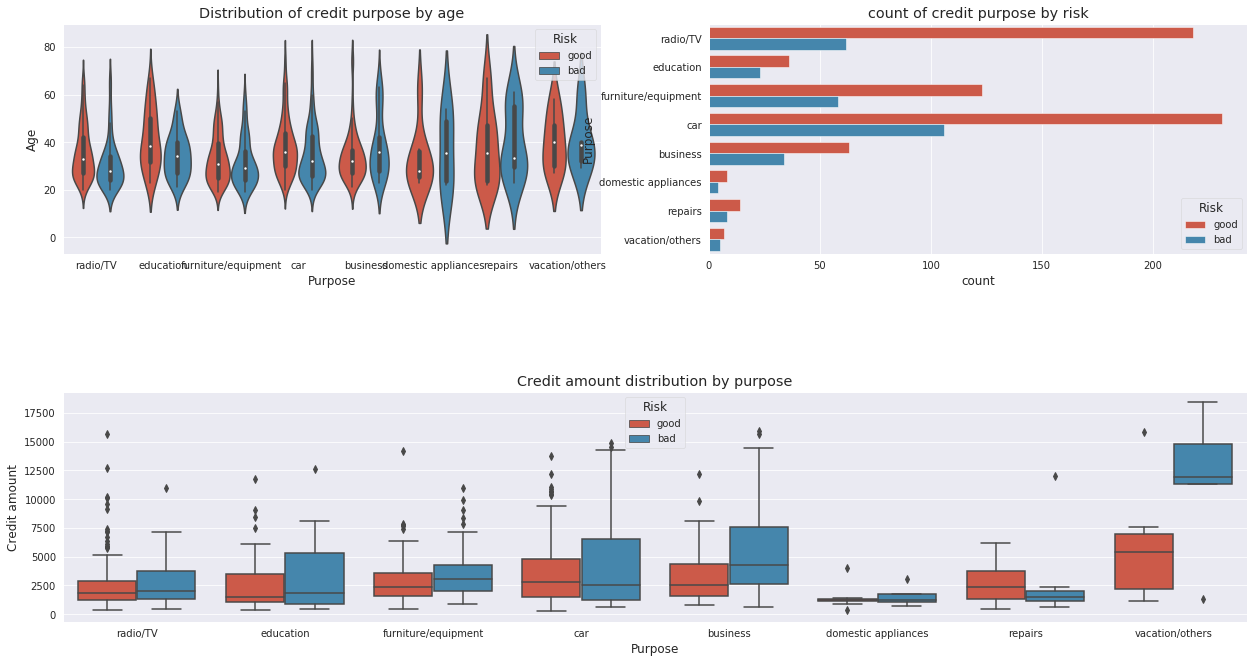

In [12]:
fig, ax = plt.subplots(figsize = (14, 11))
plt.subplots_adjust(right = 1.3, hspace = 0.6)

plt.subplot(2, 2, 1)
plt.title('Distribution of credit purpose by age')
sns.violinplot(x = 'Purpose', y = 'Age', hue = 'Risk', data = df_credit);

plt.subplot(2, 2, 2)
plt.title('count of credit purpose by risk')
sns.countplot(y = 'Purpose', hue = 'Risk', data = df_credit);

plt.subplot(2, 1, 2)
plt.title('Credit amount distribution by purpose')
sns.boxplot(x = 'Purpose', y = 'Credit amount', hue = 'Risk', data = df_credit);

<h5> Time for feature engineering</h5>

<h4>First we have to deal with converting categorial varibles into dummy variables </h4>

<h4>Fixing the mixing values </h4>

<h4>Balancing the dataset </h4>

<h4> One hot encode the Risk (Target variable) </h4>

In [13]:
#install the mlextend library 
!pip install -U mlxtend

Requirement already up-to-date: mlxtend in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.17.3)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.23.2)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [101]:
#import all the libraries for model development (scikit_learn)

from sklearn.preprocessing import OneHotEncoder, StandardScaler #for preprocessing the data 
from sklearn.feature_selection import chi2, f_classif, SelectKBest # for feature selection 
from sklearn.impute import SimpleImputer #for dealing with  missing values 
from sklearn.metrics import make_scorer, f1_score #to manipulate the scoring parameter
from sklearn.utils import resample #for balancing the DataConversionWarning
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

#import all the algorithms we will need for this classification 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC


#import libraries for model tuninig 
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#import library for plotting decision boundary 
from mlxtend.plotting import plot_decision_regions

In [102]:
df_credit_copy = df_credit.copy()

In [103]:
#drop the checking account 
df_credit_copy.drop(['Checking account'], axis = 1, inplace = True)

In [104]:
#Fix the missing values in the Saving accounts and the checking account 
df_credit_copy = df_credit_copy.dropna(subset= ['Saving accounts'], axis = 0)

In [105]:
#inspect the result
df_credit_copy.shape

(817, 9)

In [106]:
#select all categorical variables to convert them into dummies
df_category = df_credit_copy.drop(['Risk'], axis = 1).select_dtypes(include = object)
df_category.head()

,Sex,job,Housing,Saving accounts,Purpose
1,female,skilled employee / official,own,little,radio/TV
2,male,unskilled - resident,own,little,education
3,male,skilled employee / official,free,little,furniture/equipment
4,male,skilled employee / official,free,little,car
6,male,skilled employee / official,own,quite rich,furniture/equipment


In [107]:
df_dummy = pd.get_dummies(df_category, drop_first = True).join(df_credit_copy['Risk'])
df_dummy.head()

,Sex_male,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,bad
2,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,good
3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,good
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,bad
6,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,good


In [108]:
#select all numeric variables 
df_int = df_credit_copy.select_dtypes(exclude = object)
df_int.head()

,Age,Credit amount,Duration
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
6,53,2835,24


In [109]:
df_new = df_int.join(df_dummy)
df_new.head()

,Age,Credit amount,Duration,Sex_male,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
1,22,5951,48,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,bad
2,49,2096,12,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,good
3,45,7882,42,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,good
4,53,4870,24,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,bad
6,53,2835,24,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,good


In [110]:
#check the size of df_new 
df_new.shape

(817, 20)

In [111]:
#sepereate the dataset into Target and predictor variables 
X = df_new.drop(['Risk'], axis = 1).copy()
y = df_new['Risk'].copy()

In [112]:
#I can assigning bad to be 0 and good to be 1
y = y.map({'bad': 0, 'good': 1})

In [113]:
rf = RandomForestClassifier(random_state= 42)
log_reg = LogisticRegression(random_state = 42)
svm = LinearSVC(random_state = 42)
svc  = SVC(random_state = 42)

In [114]:
#setting the scoring parameter
scorer = make_scorer(f1_score, average = 'weighted')

In [148]:
kfold = StratifiedKFold(n_splits= 5, shuffle= True)

In [149]:
#I have 4 models, therefore,I will go use the cross val score to check which would perform best 
def cross_val(model): 
    for model in model: 
        score = np.mean(cross_val_score(model, X, y, cv = kfold, scoring = scorer))
        print('The score of ', model , ' is ', str(score))
        print(' ')
        
models = [rf, log_reg, svm, svc]
cross_val(models)

The score of  RandomForestClassifier(random_state=42)  is  0.6540107610074296
 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

The score of  LogisticRegression(random_state=42)  is  0.65345701529567
 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, i

The score of  LinearSVC(random_state=42)  is  0.4911917780128568
 
The score of  SVC(random_state=42)  is  0.593022776681242
 


<h5> From the above analysis using cross validation score, the random forest was the best algorithm followed by logistic regression. 
the third best algorithm is the non-linear svm followed by the linear svc </h5>

<h3> Time to plot my decision boundary. In order to do this, I will use the feature selection algorithm to find the variables that 
are most important for the prediction of credit risk</h3>

In [150]:
best_vars = SelectKBest(chi2, k = 6).fit(X, y).get_support()

In [151]:
#Here I am creating a mini dataframe in which to put in all the best selected algorithms
df_best = pd.DataFrame(X, columns = X.columns[best_vars]).join(y)
df_best.head()

,Age,Credit amount,Duration,Housing_rent,Saving accounts_rich,Purpose_radio/TV,Risk
1,22,5951,48,0,0,1,0
2,49,2096,12,0,0,0,1
3,45,7882,42,0,0,0,1
4,53,4870,24,0,0,0,0
6,53,2835,24,0,0,0,1


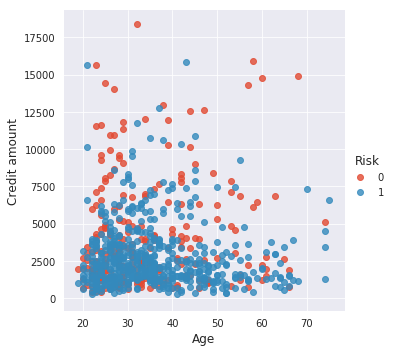

In [152]:
#checking the decision boundary using the 'age' and 'credit amount'
sns.lmplot('Age', 'Credit amount', hue = 'Risk', data = df_best, fit_reg = False);

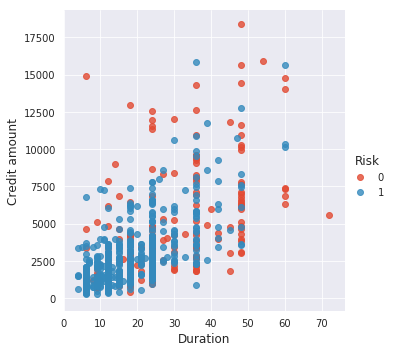

In [153]:
#checking the decision boundary using the 'duration' and 'credit amount'
sns.lmplot('Duration', 'Credit amount', hue = 'Risk', data = df_best, fit_reg = False);

<h5> From the above two plots, it is obvious that the decision boundary is non-linear and the 'bad' and 'good' classes represented by 0 and 1 respectively are not linearly seperable. </h5>

<h5> Time to split the data in train and test set. This is usually done before balancing the data </h5> 

In [154]:
X.shape, y.shape

((817, 19), (817,))

In [155]:
#first, I will reshpae the Target (y) variable
#y = np.array(y).reshape(-1, 1)

In [156]:
#check code
y.shape

(817,)

In [157]:
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [158]:
#check the size of the train and test data to make sure that they are equal 
X_train.shape, y_train.shape

((653, 19), (653,))

In [159]:
X_test.shape, y_test.shape

((164, 19), (164,))

In [160]:
#time for data balancing 
df_sample = pd.concat([X_train, y_train], axis = 1, ignore_index = False)
df_sample.head()

,Age,Credit amount,Duration,Sex_male,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
795,22,2301,9,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
160,36,2872,24,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
39,24,458,9,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
351,29,959,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
497,40,1585,24,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [161]:
#seperate the sample into big and small classes
small_class = df_sample[df_sample['Risk'] == 0]
big_class = df_sample[df_sample['Risk'] == 1]

In [162]:
#check the result
small_class.shape, big_class.shape

((214, 20), (439, 20))

In [163]:
upsampled_class = resample(small_class, n_samples = len(big_class), replace = True, random_state = 42)

In [164]:
#concatenate the upsampled class the big class together 
X_upsampled = pd.concat([upsampled_class, big_class], axis = 0, ignore_index= True)

In [165]:
#split the upsampled data into predictor and target variables 
X_train = X_upsampled.drop('Risk', axis = 1)
y_train = X_upsampled['Risk']

In [166]:
#check the result 
X_train.shape, y_train.shape

((878, 19), (878,))

<h5> Given that I will be predicting with multiple models, I will have multiple pipelines </h5> 

In [186]:
#Time to construct our pipeline 
scaler = StandardScaler() # to scale our data using standard deviation 
best_vars = SelectKBest(f_classif) # for feature selection
impute = SimpleImputer() # to fix any missing values 
rf = RandomForestClassifier(random_state= 42, oob_score= True, n_jobs= -1)

In [187]:
step_rf = [('scale', scaler), ('feature_select', best_vars), ('imputer', impute), ('RF', rf)]

In [188]:
pipeline_rf = Pipeline(step_rf)

In [189]:
param = {'feature_select__k': np.arange(1, 19, 1)}

In [190]:
gridsearch = GridSearchCV(pipeline_rf, param_grid = param, cv = kfold, scoring = scorer, return_train_score= True)

In [191]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('feature_select', SelectKBest()),
                                       ('imputer', SimpleImputer()),
                                       ('RF',
                                        RandomForestClassifier(n_jobs=-1,
                                                               oob_score=True,
                                                               random_state=42))]),
             param_grid={'feature_select__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=weighted))

In [192]:
gridsearch.best_params_

{'feature_select__k': 18}

In [200]:
#This is the accuracy of the random forest using the oob_score
gridsearch.best_estimator_.steps[3][1].oob_score_

0.8644646924829157

In [215]:
#check for overfitting during the model training stage 
df_cv_result = pd.DataFrame(gridsearch.cv_results_)
df_cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_feature_select__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.997603,0.848823,0.323602,0.057577,1,{'feature_select__k': 1},0.571947,0.598958,0.616533,0.545004,...,0.585920,0.024911,18,0.612997,0.620155,0.616589,0.637547,0.616414,0.620740,0.008703
1,10.605874,0.856475,0.347322,0.046122,2,{'feature_select__k': 2},0.621036,0.681654,0.656693,0.611429,...,0.650050,0.029121,17,0.684235,0.666383,0.670496,0.682703,0.669037,0.674571,0.007400
2,10.335241,0.791016,0.296657,0.051562,3,{'feature_select__k': 3},0.771991,0.681654,0.781266,0.799634,...,0.761718,0.041201,16,1.000000,0.688659,1.000000,1.000000,1.000000,0.937732,0.124537
3,10.343224,0.474618,0.345367,0.037760,4,{'feature_select__k': 4},0.777828,0.857582,0.817333,0.787948,...,0.805265,0.029396,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,10.527706,0.812629,0.333340,0.051110,5,{'feature_select__k': 5},0.754724,0.839896,0.811765,0.793801,...,0.798716,0.027763,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [203]:
y_pred_proba = gridsearch.predict_proba(X_test)

In [249]:
y_pred = gridsearch.predict(X_test)

In [250]:
#I am varying the threshold so that I can see the result of the confusion matrix when the threshold is above 70%
[s[1] > 0.7 for s in y_pred_proba]  == gridsearch.predict(X_test)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,

In [251]:
#plot the roc_curve 
fpr, tpr, threshold = roc_curve(y_test, [s[1] > 0.7 for s in gridsearch.predict_proba(X_test)])

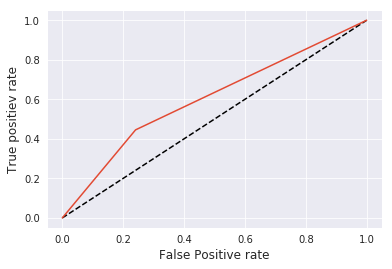

In [269]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'RF_roc_curve > 0.7')
plt.xlabel('False Positive rate')
plt.ylabel('True positiev rate')
plt.show();

In [270]:
roc_auc_score(y_test, y_pred)

0.5631313131313131

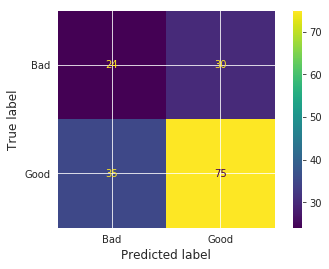

In [256]:
#plot the confusion matrix 
plot_confusion_matrix(gridsearch, X_test, y_test, display_labels=['Bad', 'Good']);

In [261]:
confusion_matrix(y_test,[s[1] > 0.7 for s in y_pred_proba]).ravel()

array([41, 13, 61, 49])

In [262]:
#we can calculate the cost of the fp and fn for the company X
def compute_cost(cost_fn = 0, cost_fp = 10):
    tn, fp, fn, tp = confusion_matrix(y_test,[s[1] > 0.7 for s in y_pred_proba]).ravel()
    return (cost_fn * fn + cost_fp * fp)

In [267]:
print('The cost of allowing false positive in your model is $',compute_cost())

The cost of allowing false positive in your model is $ 130


In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42        54
           1       0.71      0.68      0.70       110

    accuracy                           0.60       164
   macro avg       0.56      0.56      0.56       164
weighted avg       0.61      0.60      0.61       164

